In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("consolidated-metrics.csv") #reading csv file

In [3]:
df.shape

(4294, 97)

In [4]:
df.head()

,timestamp,apiserver_current_inflight_requests,apiserver_request_latencies_summary,apiserver_response_sizes_sum,apiserver_storage_transformation_latencies_microseconds_sum,aws_cpu_utilization,aws_ec2_cpuutilization_average,aws_ec2_network_out_average,aws_network_out,cgroup_manager_operation_rate,container_cpu_cfs_throttled_seconds_total,container_fs_inodes_free,container_fs_usage_bytes,container_fs_writes_total,container_memory_cache,container_memory_mapped_file,container_memory_rss,container_memory_usage_bytes,container_memory_working_set_bytes,coredns_kubernetes_dns_programming_duration_seconds_count,coredns_kubernetes_dns_programming_duration_seconds_sum,etcd_object_counts,etcd_request_latencies_summary_count,http_request_duration_microseconds,http_response_size_bytes,httpsessions_active,kafka_log_size_growth_rate,kafka_network_receive,kafka_network_transmit,kanban_boards_creation,kanban_tasks_complete_with_200_status,kanban_tasks_get_history,kube_pod_start_time,kube_poddisruptionbudget_status_current_healthy,kube_replicaset_created,kubelet_cgroup_manager_latency_microseconds,kubelet_container_log_filesystem_used_bytes,kubelet_operation_rate,kubelet_pleg_relist_interval_microseconds,kubelet_pleg_relist_latency_microseconds,...,node_filesystem_free_bytes,node_load1,node_load15,node_load5,node_memory_Active_anon_bytes,node_memory_Active_bytes,node_memory_Active_file_bytes,node_memory_AnonHugePages_bytes,node_memory_AnonPages_bytes,node_memory_Buffers_bytes,node_memory_Cached_bytes,node_memory_Committed_AS_bytes,node_memory_Dirty_bytes,node_memory_Inactive_anon_bytes,node_memory_Inactive_bytes,node_memory_Inactive_file_bytes,node_memory_KernelStack_bytes,node_memory_Mapped_bytes,node_memory_MemAvailable_bytes,node_memory_MemFree_bytes,node_memory_SReclaimable_bytes,node_memory_SUnreclaim_bytes,node_memory_Shmem_bytes,node_memory_Slab_bytes,node_memory_Writeback_bytes,node_netstat_Tcp_CurrEstab,node_nf_conntrack_entries,node_procs_blocked,node_procs_running,node_scrape_collector_duration_seconds,node_sockstat_TCP_inuse,node_sockstat_TCP_mem,node_sockstat_TCP_mem_bytes,node_sockstat_TCP_orphan,node_sockstat_TCP_tw,node_sockstat_sockets_used,node_timex_estimated_error_seconds,node_timex_frequency_adjustment_ratio,node_timex_maxerror_seconds,status
0,2020-09-18 21:45:03,0.008333,4.775001e+06,6871.300000,0.025000,13.8,0.000,0.000000,0.000000,0.145833,0.0,155876.292281,4.582444e+08,31.947430,3.290259e+07,6.833672e+06,2.183418e+08,2.930822e+08,2.824967e+08,0.0,0.0,0.308333,7.333333,6.347728,0.066667,0.375000,1220.783333,5724.919214,8424.376927,0.0,0.3750,0.3750,0.0,0.0,0.0,2.716667,1.131008e+06,0.0,84978.795216,1549.886504,...,2.470222e+08,0.017197,0.018250,0.014958,5.852687e+07,6.471299e+07,5.355418e+06,0.0,7.410060e+07,153.600000,9.880303e+06,2.244632e+08,11963.733333,1757.866667,3.394628e+06,3.392870e+06,292044.800000,4.656657e+06,4.891639e+07,1.323989e+07,1.310447e+06,3.931375e+06,6553.600000,7.881847e+06,0.000000,0.033333,15.125000,0.0,0.120833,0.001250,0.054167,2.233333,9147.733333,0.000000,0.983333,25.441667,7.625000e-07,0.025000,0.000291,NORMAL
1,2020-09-18 21:46:03,0.008333,3.862502e+06,7065.713485,0.025000,19.2,0.025,1752.173542,1752.173542,0.145833,0.0,112788.516331,4.584697e+08,26.978072,1.859325e+07,6.970226e+06,2.306738e+08,3.136550e+08,3.100925e+08,0.0,0.0,0.608335,7.358352,186.125180,0.091667,13.237500,752.341667,2623.485430,4151.707333,0.0,0.2250,0.2250,0.0,0.0,0.0,2.016667,1.505963e+06,0.0,76434.145833,1424.675000,...,2.866220e+08,0.018625,0.018750,0.014417,7.601149e+07,8.622403e+07,5.355025e+06,0.0,8.548780e+07,170.666667,9.875763e+06,2.561419e+08,12834.133333,1757.866667,3.390208e+06,3.388450e+06,391031.466667,6.656427e+06,5.041085e+07,1.104294e+07,1.823659e+06,5.218253e+06,12117.333333,1.042432e+07,0.000000,0.029167,13.591667,0.0,0.108333,0.001182,0.050000,2.887500,11827.200000,0.000000,0.666667,25.420833,7.458333e-07,0.025000,0.000365,CPU_BURN_KANBAN_API_GATEWAY
2,2020-09-18 21:47:03,0.008333,3.862502e+06,6675.4

In [5]:
null_values = df.isna().sum() 

In [6]:
null_values.sort_values(ascending=False)[0:10] #checking count of null values of top 10 features

kubelet_pod_worker_duration_bucket       4073
kanban_tasks_get_history                  211
kanban_tasks_complete_with_200_status     211
kafka_log_size_growth_rate                 18
kubelet_volume_stats_used_bytes             5
kubelet_volume_stats_inodes_used            5
kubelet_volume_stats_inodes_free            5
kubelet_volume_stats_available_bytes        5
kafka_network_transmit                      4
kafka_network_receive                       4
dtype: int64

In [7]:
null_values_y = df["status"].isna() #checking null values for labels i.e., for status

In [8]:
null_values_y.sum() #got only one null values for labels

1

In [9]:
null_values_y.sort_values()

0       False
2854    False
2855    False
2856    False
2857    False
        ...  
1428    False
1427    False
1426    False
1432    False
2196     True
Name: status, Length: 4294, dtype: bool

In [10]:
df = df.drop(2196) #drop the row where "status" or label has null value

In [11]:
df["status"].isna().sum() 

0

In [12]:
import matplotlib.pyplot as plt

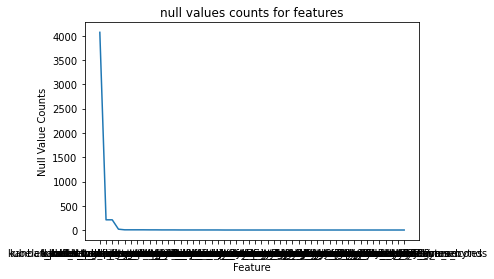

In [13]:
plt.plot(null_values.sort_values(ascending=False)[0:50]) #bar graph for null values counts for top 50 features
plt.title("null values counts for features")
plt.xlabel("Feature")
plt.ylabel("Null Value Counts")
plt.show()

In [14]:
df = df.drop(columns = ["kubelet_pod_worker_duration_bucket"]) #droping the feature with most number of null values i.e., 4073

In [15]:
df.shape

(4293, 96)

In [16]:
label_freq = df["status"].value_counts() #checking distribution or counts of each labels or status

In [17]:
label_freq

NORMAL                                  2757
NETWORK_DELAY_KANBAN_API_GATEWAY         646
NETWORK_DELAY_KANBAN_COMMAND_SERVICE     500
POD_KILL_KANBAN_API_GATEWAY              310
CPU_BURN_KANBAN_API_GATEWAY               80
Name: status, dtype: int64

In [18]:
len(label_freq)

5

In [19]:
import matplotlib.pyplot as plt

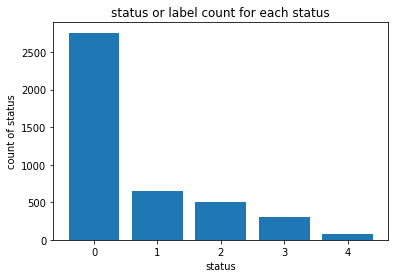

In [20]:
plt.bar(range(0, len(label_freq)), label_freq) #bar plot for each labesl show clearly datset is imbalanced
plt.title("status or label count for each status")
plt.xlabel("status")
plt.ylabel("count of status")
plt.show()

In [21]:
from sklearn.impute import SimpleImputer
import numpy as np

In [22]:
sim_imp = SimpleImputer(missing_values=np.NaN, strategy='most_frequent') #filling null values with most frequent value

In [23]:
X = df.drop(columns = ["status"])
y = df["status"]

In [24]:
X= sim_imp.fit_transform(X) # fit the simple imputer

In [25]:
X

array([['2020-09-18 21:45:03', 0.008333333333333, 4775001.30416667, ...,
        7.625e-07, 0.025000056176885, 0.000290786690069],
       ['2020-09-18 21:46:03', 0.0083333680557, 3862501.51666667, ...,
        7.45833333333333e-07, 0.025000054527474, 0.000365370833333],
       ['2020-09-18 21:47:03', 0.008333333333333, 3862501.51666667, ...,
        7.05572763888889e-07, 0.020833380734126, 0.00039064581775],
       ...,
       ['2020-09-19 17:59:13', 0.013892944444445, 4700001.275, ...,
        6.87719347222222e-07, 0.020833377277438, 0.000327470833333],
       ['2020-09-19 18:00:13', 0.011113138888889, 2470833.99166667, ...,
        7.75991111111111e-07, 0.025000064379247, 0.000328179166667],
       ['2020-09-19 18:01:13', 0.011113138888889, 9135693.95833333, ...,
        9.13354211806207e-07, 0.033333463681436, 0.000325236772705]],
      dtype=object)

In [26]:
dataframe = pd.DataFrame.from_records(X) #creating dataset so we have numerical columns

In [27]:
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94
0,2020-09-18 21:45:03,0.008333,4.775001e+06,6871.300000,0.025000,13.8,0.000,0.000000,0.000000,0.145833,0.0,155876.292281,4.582444e+08,31.947430,3.290259e+07,6.833672e+06,2.183418e+08,2.930822e+08,2.824967e+08,0.0,0.0,0.308333,7.333333,6.347728,0.066667,0.375000,1220.783333,5724.919214,8424.376927,0.0,0.3750,0.3750,0.0,0.0,0.0,2.716667,1.131008e+06,0.0,84978.795216,1549.886504,...,113091.612500,2.470222e+08,0.017197,0.018250,0.014958,5.852687e+07,6.471299e+07,5.355418e+06,0.0,7.410060e+07,153.600000,9.880303e+06,2.244632e+08,11963.733333,1757.866667,3.394628e+06,3.392870e+06,292044.800000,4.656657e+06,4.891639e+07,1.323989e+07,1.310447e+06,3.931375e+06,6553.600000,7.881847e+06,0.000000,0.033333,15.125000,0.0,0.120833,0.001250,0.054167,2.233333,9147.733333,0.000000,0.983333,25.441667,7.625000e-07,0.025000,0.000291
1,2020-09-18 21:46:03,0.008333,3.862502e+06,7065.713485,0.025000,19.2,0.025,1752.173542,1752.173542,0.145833,0.0,112788.516331,4.584697e+08,26.978072,1.859325e+07,6.970226e+06,2.306738e+08,3.136550e+08,3.100925e+08,0.0,0.0,0.608335,7.358352,186.125180,0.091667,13.237500,752.341667,2623.485430,4151.707333,0.0,0.2250,0.2250,0.0,0.0,0.0,2.016667,1.505963e+06,0.0,76434.145833,1424.675000,...,113086.812500,2.866220e+08,0.018625,0.018750,0.014417,7.601149e+07,8.622403e+07,5.355025e+06,0.0,8.548780e+07,170.666667,9.875763e+06,2.561419e+08,12834.133333,1757.866667,3.390208e+06,3.388450e+06,391031.466667,6.656427e+06,5.041085e+07,1.104294e+07,1.823659e+06,5.218253e+06,12117.333333,1.042432e+07,0.000000,0.029167,13.591667,0.0,0.108333,0.001182,0.050000,2.887500,11827.200000,0.000000,0.666667,25.420833,7.458333e-07,0.025000,0.000365
2,2020-09-18 21:47:03,0.008333,3.862502e+06,6675.475000,0.025000,19.2,0.050,3504.347083,3504.347083,0.145833,0.0,189477.123216,3.193578e+08,20.248524,2.117443e+07,6.108143e+06,2.469483e+08,3.019200e+08,3.036381e+08,0.0,0.0,0.616667,7.325000,365.901133,0.116667,26.100000,283.900000,2900.168552,4640.112559,0.0,0.0750,0.0750,0.0,0.0,0.0,1.408333,1.506185e+06,0.0,72244.237500,1467.245833,...,108349.379167,2.343646e+08,0.022486,0.016833,0.011958,7.569782e+07,8.590766e+07,4.027631e+06,0.0,8.421122e+07,273.066667,5.502822e+06,2.229538e+08,10154.666667,1757.866667,3.843413e+04,3.851947e+04,342886.400000,5.300634e+06,4.268711e+07,1.048521e+07,1.874944e+06,4.745335e+06,12117.333333,9.538799e+06,13.667726,0.033333,12.487500,0.0,0.079167,0.001096,0.054167,2.741667,11229.866667,0.000000,0.508333,24.612500,7.055728e-07,0.020833,0.000391
3,2020-09-18 21:48:03,0.016138,2.483334e+06,6890.495833,0.000000,19.2,0.025,1752.173542,1752.173542,0.133333,0.0,153259.698853,2.997300e+08,14.809318,1.080610e+07,5.707305e+06,2.692826e+08,3.388779e+08,3.544549e+08,0.0,0.0,0.616667,7.300000,389.451621,0.062500,25.641667,141.950000,2633.450167,4369.149239,0.0,0.0375,0.0375,0.0,0.0,0.0,1.475000,4.352000e+05,0.0,72293.366667,1451.816667,...,112843.545833,2.255894e+08,0.026375,0.017875,0.013083,7.476983e+07,8.694583e+07,4.026829e+06,0.0,8.327112e+07,324.266667,5.494989e+06,1.988007e+08,9301.333333,1570.133333,3.061760e+04,3.063467e+04,192904.533333,3.140710e+06,4.902584e+07,9.638571e+06,1.484885e+06,3.451034e+06,5580.800000,6.933965e+06,13.667726,0.004167,13.612500,0.0,0.108333,0.001665,0.004167,1.870833,7662.933333,0.000000,0.683333,19.108333,5.750000e-07,0.016667,0.000383
4,2020-09-18 21:49:03,0.020305,4.500002e+06,7040.254167,0.020833,19.2,0.000,0.000000,0.000000,0.133333,0.0,153271.254383,3.514757e+08,13.626455,5.193350e+06,2.741833e+06,2.251060e+08,2.762528e+08,3.232417e+08,0.0,0.0,0.308333,7.266667,413.002108,0.008333,25.183333,0.000000,2963.510608,4557.696981,0.0,0.0000,0.0000,0.0,0.0,0.0,1.537500,2.019514e+06,0.0,76600.004733,1657.775172,...,112841.975000,1.859860e+08,0.029754,0.016667,0.017708,7.7

In [28]:
dataframe.shape

(4293, 95)

In [29]:
dataframe.isna().sum().max()

0

In [30]:
dataframe.columns

RangeIndex(start=0, stop=95, step=1)

In [31]:
dataframe = dataframe.drop(columns = [0]) #droping the first coloumn which is not usefull

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
dataframe = pd.DataFrame.from_records(StandardScaler().fit_transform(dataframe)) #apply standardization to the features

In [34]:
dataframe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
0,-0.546929,-0.086674,-0.239041,-0.154638,-0.786578,-0.777552,-0.378729,-0.378729,0.476559,-0.029963,-0.480717,1.717853,-0.301492,1.047767,0.950266,0.984795,0.997783,0.704654,-0.062429,-0.057884,0.253098,0.829633,-0.896666,-0.748362,-0.582612,-0.243467,-0.253719,-0.170152,0.0,-0.276919,-0.277164,-0.043387,-0.032393,0.0,-0.160471,0.364826,-0.211084,1.791188,0.919679,-0.344374,...,-1.168986,-0.866951,-0.221428,0.252173,-0.318391,0.539108,0.277176,1.327898,-0.304916,1.160354,-0.204186,0.636444,0.042583,-0.298474,0.282042,-0.149141,-0.149399,0.574752,0.428004,-0.624822,-0.592571,2.172097,0.797420,0.403736,0.955779,-0.070581,-0.416537,0.372990,-0.184684,-0.393771,-0.158941,-0.444576,0.660252,0.660252,-0.118262,0.313594,1.473340,0.049306,-1.213471,-1.180491
1,-0.546925,-0.420153,-0.228680,-0.154638,-0.418086,-0.575809,-0.291935,-0.291935,0.476568,-0.029963,-1.228496,1.720183,-0.352948,0.305668,1.008340,1.182639,1.276173,1.120775,-0.062429,-0.057884,0.782890,1.015739,-0.401159,-0.748133,0.154753,-0.287220,-0.360274,-0.226925,0.0,-0.311683,-0.311975,-0.043387,-0.032393,0.0,-0.199045,0.997446,-0.211084,1.095281,0.467181,-0.344374,...,-1.169071,-0.376487,-0.092028,0.319816,-0.376543,1.512257,1.251094,1.327763,-0.304916,1.745965,-0.203969,0.635839,0.559412,-0.277978,0.282042,-0.150013,-0.150271,1.756508,1.662639,-0.517042,-0.881453,3.338827,2.562909,1.734847,2.695799,-0.070581,-0.535885,0.125688,-0.184684,-0.776752,-0.326278,-0.516023,1.356190,1.356190,-0.118262,-1.188042,1.468704,0.034749,-1.213471,0.309891
2,-0.546929,-0.420153,-0.249477,-0.154638,-0.418086,-0.374067,-0.205142,-0.205142,0.476568,-0.029963,0.102418,0.281165,-0.422629,0.439531,0.641714,1.443730,1.117376,1.023447,-0.062429,-0.057884,0.797604,0.767643,0.094344,-0.747905,0.892119,-0.330973,-0.350768,-0.220436,0.0,-0.346448,-0.346787,-0.043387,-0.032393,0.0,-0.232568,0.997820,-0.211084,0.754040,0.621026,-0.344374,...,-1.253436,-1.023722,0.257845,0.060520,-0.640464,1.494799,1.236771,0.868554,-0.304916,1.680314,-0.202666,0.052578,0.017959,-0.341074,0.282042,-0.810949,-0.811168,1.181726,0.825588,-1.074074,-0.954789,3.455419,1.914106,1.734847,2.089765,-0.045763,-0.416537,-0.052396,-0.184684,-1.670375,-0.536594,-0.444576,1.201044,1.201044,-0.118262,-1.938860,1.288824,-0.000416,-1.872702,0.814950
3,0.433690,-0.924179,-0.238018,-0.332200,-0.418086,-0.575809,-0.291935,-0.291935,-0.322940,-0.029963,-0.526127,0.078129,-0.478950,-0.098183,0.471247,1.802041,1.617488,1.789720,-0.062429,-0.057884,0.797604,0.581674,0.159255,-0.748400,0.865844,-0.344232,-0.359932,-0.224036,0.0,-0.355139,-0.355490,-0.043387,-0.032393,0.0,-0.228894,-0.809133,-0.211084,0.758041,0.565267,-0.344374,...,-1.173403,-1.132408,0.610254,0.201442,-0.519687,1.443150,1.283774,0.868276,-0.304916,1.631968,-0.202014,0.051533,-0.376093,-0.361168,0.130707,-0.812490,-0.812724,-0.608839,-0.507925,-0.616928,-1.066115,2.568664,0.138433,0.170995,0.307066,-0.045763,-1.251973,0.129048,-0.184684,-0.776752,0.857958,-1.301941,0.274605,0.274605,-0.118262,-1.109009,0.063976,-0.114463,-2.531934,0.670148
4,0.957219,-0.187174,-0.230036,-0.184232,-0.418086,-0.777552,-0.378729,-0.378729,-0.322940,-0.029963,-0.525927,0.613403,-0.491198,-0.389267,-0.789907,1.093313,0.770048,1.319052,-0.062429,-0.057884,0.253098,0.333714,0.224165,-0.748895,0.839569,-0.357490,-0.348592,-0.221531,0.0,-0.363830,-0.364193,-0.043387,-0.032393,0.0,-0.225450,1.863904,-0.211084,1.108789,1.309575,-0.344374,...,-1.173431,-1.622917,0.916456,0.037973,-0.023158,1.603769,0.784822,-0.523904,-0.304916,1.277057,-0.201797,-0.677011,-1.460985,-0.372421,0.144464,-0.812254,-0.812491,-0.540175,-0.512814,-0.402166,-0.977851,1.401934,0.670704,0.166912,0.839364,-0.045763,-0.416537,-0.298353,-0.184684,0.244532,1.110594,-1.301941,0.287903,0.287903,-0.052325,

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test, y_train, y_test = train_test_split(dataframe, y) #splitting the dataset in test and train

In [37]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [38]:
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train) #using one vs rest classifier with SVC classifier

In [39]:
preds = clf.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
acc = accuracy_score(preds, y_test)

In [42]:
print("training accuracy : {}".format(accuracy_score(clf.predict(X_train), y_train)*100)) #training accuracry

training accuracy : 94.9363156259708


In [43]:
print("testing accuracy : {}".format(acc*100)) #testing accuracy

testing accuracy : 89.57169459962756


### Now we can see that the training and testing accuracy is not that great. So I start selecting the important features so that performance is increase.

In [44]:
nunique = dataframe.nunique() #checking how many unique values each features have

In [45]:
nunique.sort_values()[0:20] #sort and taking top 20 values

28      1
33      1
9       5
32      5
18      7
31     11
19     12
36     20
82     27
39     29
43     35
44     39
41     49
40     69
62    110
3     153
79    156
8     178
49    191
4     212
dtype: int64

In [46]:
bins = list(range(0, len(nunique)))

[]

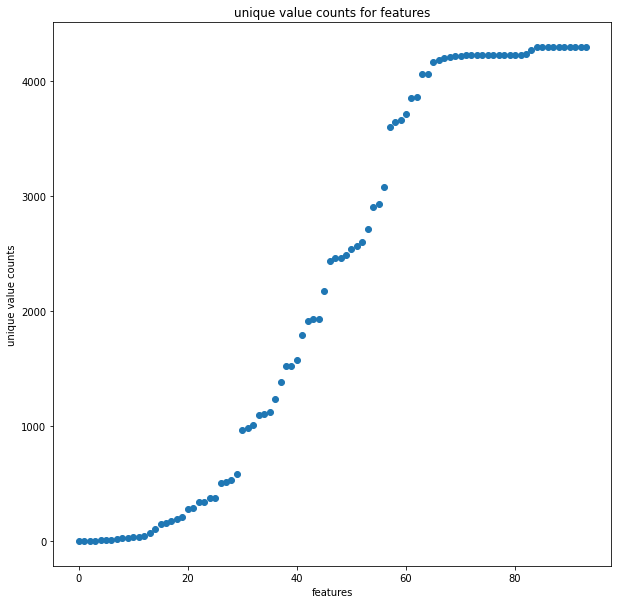

In [47]:
w = 10                                      #plot showing for each features the value of uniques values
h = 10                            
fig, ax = plt.subplots()
fig.set_size_inches(w,h)
plt.title("unique value counts for features")
plt.xlabel("features")
plt.ylabel("unique value counts")
plt.scatter(bins, nunique.sort_values())
plt.plot()

In [48]:
to_del = [i for i,v in enumerate(nunique) if (float(v)/dataframe.shape[0]*100) < 1] 
print(to_del)  #selecting features whose have 1% of unique values with respect to the values

[9, 18, 19, 28, 31, 32, 33, 36, 39, 43, 44, 82]


In [53]:
# drop useless columns
dataframe.drop(to_del, axis=1, inplace=True) 
print(dataframe.shape)

In [54]:
dups = dataframe.duplicated() #checking duplicates rows

In [55]:
print(dups.any())

False


#### Training again with same classifier with regularization and with rbf kernel

In [56]:
X_train,X_test, y_train, y_test = train_test_split(dataframe, y) #split data in test train
clf = OneVsRestClassifier(SVC(kernel = "rbf", C=10)).fit(X_train, y_train) #start training
preds = clf.predict(X_test) #getting the prediction
print("Training accuracy : {}".format(accuracy_score(clf.predict(X_train), y_train)*100)) #training accuracy
acc = accuracy_score(preds, y_test)
print("Testing accuracy : {}".format(acc*100)) #testing accuracy

Training accuracy : 99.93786890338615
Testing accuracy : 94.87895716945997


#### We can see that both training and testing accuracy is increased but still there is a chance to improvement, So I use hyperparameters tuning with the help of Random Grid Search.

In [57]:
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV
c = [10, 100, 1000, 10000, 1000000, 100000000] #values of c i.e., reciprocals of regularization
random_grid = {"estimator__C":c,
               "estimator__kernel": ["poly","rbf", "sigmoid"] #different kernel function
               }
model_to_set = OneVsRestClassifier(SVC(kernel="poly"))

In [58]:
clf.get_params()

{'estimator': SVC(C=10),
 'estimator__C': 10,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'n_jobs': None}

In [59]:
X_train,X_test, y_train, y_test = train_test_split(dataframe, y)
clf = OneVsRestClassifier(SVC())
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
svf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid,scoring='accuracy', n_iter = 18, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [60]:
svf_random.fit(X_train, y_train) #training the models

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   1.1s
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   1.1s
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   1.1s
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   1.2s
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   1.1s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   1.2s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   1.2s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   1.2s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   1.2s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   1.2s
[CV] END .........estimator__C=10, estimator__kernel=sigmoid; total time=   0.6s
[CV] END .........estimator__C=10, estimator__ke

RandomizedSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=SVC()),
                   n_iter=18, n_jobs=1,
                   param_distributions={'estimator__C': [10, 100, 1000, 10000,
                                                         1000000, 100000000],
                                        'estimator__kernel': ['poly', 'rbf',
                                                              'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [61]:
print(svf_random.best_params_)
preds = svf_random.predict(X_test)
print("trainig accuracy : {}".format(accuracy_score(svf_random.predict(X_train), y_train)*100))
acc = accuracy_score(preds, y_test)
print("testing accuracy : {}".format(acc*100))

{'estimator__kernel': 'rbf', 'estimator__C': 100}
trainig accuracy : 100.0
testing accuracy : 94.87895716945997


#### performance didn't increase that much for I try different classifier i.e., Random forest

In [62]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [63]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [64]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()

In [65]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [66]:
import pandas as pd

In [67]:
y_train_new = pd.get_dummies(y_train) #one hot encoding

In [68]:
y_test_new = pd.get_dummies(y_test)

In [69]:
y_train_new.head()

,CPU_BURN_KANBAN_API_GATEWAY,NETWORK_DELAY_KANBAN_API_GATEWAY,NETWORK_DELAY_KANBAN_COMMAND_SERVICE,NORMAL,POD_KILL_KANBAN_API_GATEWAY
1101,0,0,0,1,0
401,0,0,0,1,0
1861,0,1,0,0,0
459,0,0,0,1,0
2814,0,0,0,1,0


In [70]:
rf_random.fit(X_train,y_train_new)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  10.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  14.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [71]:
print(rf_random.best_params_)
preds_train = rf_random.predict(X_train)
preds_test = rf_random.predict(X_test)


{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [72]:
X_train.shape

(3219, 82)

In [73]:
print("training accuracy : ", accuracy_score(np.argmax(preds_train, axis = 1), np.argmax(y_train_new.to_numpy(), axis = 1))*100)

training accuracy :  100.0


In [74]:
print("testing accuracy : ", accuracy_score(np.argmax(preds_test, axis = 1), np.argmax(y_test_new.to_numpy(), axis = 1))*100)

testing accuracy :  93.76163873370578


### Here we can say that even after random forest the performance didn't increase that much which is due to Data Imbalance Problem. To avoid this Problem I used Oversampling method and then I do rest of the techniques same.

In [75]:
df = pd.read_csv("consolidated-metrics.csv")

In [76]:
df = df.drop(2196)

In [77]:
df = df.drop(columns = ["kubelet_pod_worker_duration_bucket"])

In [78]:
label_freq = df["status"].value_counts()

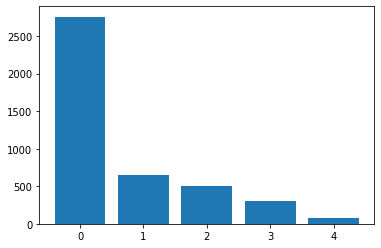

In [79]:
plt.bar(range(0, len(label_freq)), label_freq)
plt.show()

In [80]:
X = df.drop(columns = ["status", "timestamp"])
y = df["status"]

In [81]:
from sklearn.impute import SimpleImputer
import numpy as np

In [82]:
X= sim_imp.fit_transform(X)

In [83]:
X.shape

(4293, 94)

In [84]:
X = pd.DataFrame.from_records(X)

In [85]:
from imblearn.over_sampling import RandomOverSampler

In [86]:
# oversample = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler()

In [87]:
X, Y = oversample.fit_resample(X, y)

In [88]:
Y.value_counts()

NORMAL                                  2757
CPU_BURN_KANBAN_API_GATEWAY             2757
NETWORK_DELAY_KANBAN_API_GATEWAY        2757
NETWORK_DELAY_KANBAN_COMMAND_SERVICE    2757
POD_KILL_KANBAN_API_GATEWAY             2757
Name: status, dtype: int64

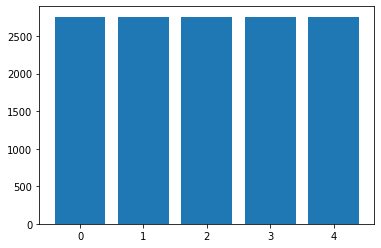

In [89]:
plt.bar(range(0, len(label_freq)), Y.value_counts())
plt.show()

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
std = StandardScaler()

In [92]:
X = pd.DataFrame.from_records(std.fit_transform(X))

In [93]:
X.shape

(13785, 94)

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train,X_test, y_train, y_test = train_test_split(X, Y)

In [96]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [97]:
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)

In [98]:
preds = clf.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score

In [100]:
acc = accuracy_score(preds, y_test)

In [101]:
print("training accuracy : ",accuracy_score(clf.predict(X_train), y_train)*100)

training accuracy :  98.81021474172954


In [102]:
print("testing accuracy : ", acc*100)

testing accuracy :  97.79518421816073


In [103]:
nunique = X.nunique()

In [104]:
to_del = [i for i,v in enumerate(nunique) if (float(v)/X.shape[0]*100) < 1]
print(to_del)

[9, 18, 19, 28, 31, 32, 33, 36, 39, 40, 41, 43, 44, 62, 82]


In [105]:
# drop useless columns
X.drop(to_del, axis=1, inplace=True)
print(X.shape)

(13785, 79)


In [106]:
X_train,X_test, y_train, y_test = train_test_split(X, Y)
clf = OneVsRestClassifier(SVC(kernel = "rbf", C=10)).fit(X_train, y_train)
preds = clf.predict(X_test)
print("training accuracy : ",accuracy_score(clf.predict(X_train), y_train)*100)
acc = accuracy_score(preds, y_test)
print("testing accuracy",acc*100)

training accuracy :  99.9806538982395
testing accuracy 99.50681752248332


In [107]:
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV
c = [10, 100, 1000, 10000, 1000000, 100000000]
random_grid = {"estimator__C":c,
               "estimator__kernel": ["poly","rbf", "sigmoid"]
               }
model_to_set = OneVsRestClassifier(SVC(kernel="poly"))

In [108]:
X_train,X_test, y_train, y_test = train_test_split(X, Y)
clf = OneVsRestClassifier(SVC())
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
svf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, scoring='accuracy', n_iter = 18, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [109]:
svf_random.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   7.0s
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   7.0s
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   6.9s
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   6.9s
[CV] END ............estimator__C=10, estimator__kernel=poly; total time=   6.9s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   6.9s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   6.9s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   6.8s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   6.9s
[CV] END .............estimator__C=10, estimator__kernel=rbf; total time=   9.8s
[CV] END .........estimator__C=10, estimator__kernel=sigmoid; total time=  12.5s
[CV] END .........estimator__C=10, estimator__ke

RandomizedSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=SVC()),
                   n_iter=18, n_jobs=1,
                   param_distributions={'estimator__C': [10, 100, 1000, 10000,
                                                         1000000, 100000000],
                                        'estimator__kernel': ['poly', 'rbf',
                                                              'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [110]:
print(svf_random.best_params_)
preds = svf_random.predict(X_test)
print("training accuracy : ", accuracy_score(svf_random.predict(X_train), y_train)*100)
acc = accuracy_score(preds, y_test)
print("testing accuracy : ",acc*100)

{'estimator__kernel': 'rbf', 'estimator__C': 100}
training accuracy :  100.0
testing accuracy :  99.68088192631274


In [111]:
#@markdown Now we can see the Performance now better than before. So save that model and Now I am passing a sample and checking the output


In [112]:
import pickle

In [113]:
filename = 'finalized_model.pkl'
pickle.dump(svf_random, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = accuracy_score(loaded_model.predict(X_train), y_train)*100
print("training accuracy : ", result)

training accuracy :  100.0


In [114]:
quary_point = df.iloc[0] #taking a quary point

In [115]:
real_label = quary_point["status"]

In [116]:
print(real_label)

NORMAL


In [117]:
quary_point[0]

'2020-09-18 21:45:03'

In [119]:
quary_point_new = quary_point.drop(["status", "timestamp", "kubelet_pod_worker_duration_bucket"])

In [120]:
quary_point_new

apiserver_current_inflight_requests                                  0.008333
apiserver_request_latencies_summary                            4775001.304167
apiserver_response_sizes_sum                                           6871.3
apiserver_storage_transformation_latencies_microseconds_sum             0.025
aws_cpu_utilization                                                      13.8
                                                                    ...      
node_sockstat_TCP_tw                                                 0.983333
node_sockstat_sockets_used                                          25.441667
node_timex_estimated_error_seconds                                   0.000001
node_timex_frequency_adjustment_ratio                                   0.025
node_timex_maxerror_seconds                                          0.000291
Name: 0, Length: 94, dtype: object

In [121]:
quary_point_new = std.transform(quary_point_new.to_numpy().reshape(1, len(quary_point_new)))

In [122]:
quary_point_new_df = pd.DataFrame.from_records(quary_point_new)

In [123]:
quary_point_new_df.drop(to_del, axis=1, inplace=True)

In [124]:
quary_point_new_df.shape

(1, 79)

In [125]:
predicted_label = loaded_model.predict(quary_point_new_df)

In [126]:
predicted_label

array(['NORMAL'], dtype='<U36')

In [127]:
print("real label is {} and the predicted label is {}".format(real_label, predicted_label))

real label is NORMAL and the predicted label is ['NORMAL']


In [ ]:
#@title Now here we can see that real label and predicted label are same and we also have save model which can re-train if new data come. So this my work and findings hope its is usefull for you and if any changes feel free to suggest. Thanks Subhash Kla